# Úkoly 
## Sympy

1. Definice Symbolů
   - Definujte symboly `a` a `b`.
   - Definujte symboly `c` a `d` jako reálná kladná čísla.


In [6]:
import sympy as sp
from IPython.display import display

sp.init_printing(use_latex=True)
a, b = sp.symbols("a b")
c, d = sp.symbols("c d", real=True, positive=True)


2. Vytvoření Výrazu
   - Vytvořte výraz $3a + 2b - 5$
   - Vytvořte výraz $\frac{a^2}{b^2} + \cos(a^2 + b)^2 + \sin(a^2 + b)^2$
   - Vytiskněte oba výrazy jako LaTeXové výrazy.
   - v obou výrazech nahraďte $a$ za $\pi$ a $b$ za $2$ a vyhodnoťte výraz s přesností na 10 desetinných míst.


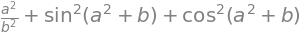

8.424777961
3.467401100


In [12]:
vyraz1 = 3*a + 2*b - 5
vyraz2 = a**2 / b**2 + sp.cos(a**2 + b)**2 + sp.sin(a**2 + b)**2

display(vyraz1)
display(vyraz2)

sub1 = vyraz1.subs({a: sp.pi, b: 2})
sub2 = vyraz2.subs({a: sp.pi, b: 2})

print(sub1.evalf(n=10))
print(sub2.evalf(n=10))


3. Úpravy výrazů
   - Vypište výraz $(a + b)^5$ pomocí jednotlivých mnohočlnů (expandujte).
   - Faktorizujte výraz $a^6 - b^6$.
   - Zjednodušte výraz $\sin^{6}{\left(a + b \right)} + 3 \sin^{4}{\left(a + b \right)} \cos^{2}{\left(a + b \right)} + 3 \sin^{2}{\left(a + b \right)} \cos^{4}{\left(a + b \right)} + \cos^{6}{\left(a + b \right)}$



In [29]:
vyraz3 = (a + b)**5
display(vyraz3.expand())

vyraz4 = a**6 - b**6
display(vyraz4.factor())

apb = a+b
vyraz5 = sp.sin(apb)**6 + 3*sp.sin(apb)**4 * sp.cos(apb)**2 + 3*sp.sin(apb)**2 * sp.cos(apb)**4 + sp.cos(apb)**6
display(vyraz5.simplify())

4. Derivace a Integrace
   - Najděte derivaci výrazu $a^2 + 3ab + b^2$ podle `a`.
   - Spočtěte $$ \intop_{-\infty}^{t} e^{-x^2} dx$$
   - Spočtěte integrál funkce $f(x) = 1-x-y$ přes pravoúhlý trojuhelník s vrcholy $[0, 0]$, $[1, 0]$, $[0, 1]$; tedy $$ \intop_{0}^{1} \intop_{0}^{1-y} 1-x-y ~~ dx dy$$


In [39]:
vyraz6 = a**2 + 3*a*b + b**2
display(vyraz6.diff(a))

x, y, t = sp.symbols("x y t", real=True)
vyraz7 = sp.E ** (-x**2/y)
display(sp.integrate(vyraz7, (x, -sp.oo, t)))

vyraz8 = 1-x-y
display(sp.integrate(sp.integrate(vyraz8, (x, 0, 1-y)), (y, 0, 1)))

⎧      ⎛        ⎛t ⎞⎞                                                         
⎪√π⋅√y⋅⎜2 - erfc⎜──⎟⎟                                                         
⎪      ⎝        ⎝√y⎠⎠      ⎛           π                                  ⎞   
⎪────────────────────  for ⎜│arg(y)│ ≤ ─ ∧ │2⋅arg(t) - 2⋅arg(y) + 2⋅π│ < π⎟ ∨ 
⎪         2                ⎝           2                                  ⎠   
⎪                                                                             
⎪    t                                                                        
⎨    ⌠                                                                        
⎪    ⎮     2                                                                  
⎪    ⎮   -x                                                                   
⎪    ⎮   ────                                                                 
⎪    ⎮    y                                                                   
⎪    ⎮  ℯ     dx                                    

5. Řešení Rovnic
    - Najděte řešení rovnice $a^2 - 5a + 6 = 0$ vzhledem k `a`.
    - Najděte řešení soustavy rovnic $$ a + b = 5 $$ $$ a - b = 1 $$ vzhledem k `a` a `b`.
    - Nalezněte všechny kořeny Legendrova polynomu stupně 5. Použíjte `sympy.legendre()` pro vytvoření výrazu odpovídajícímu Legendrovu polynomu.
    

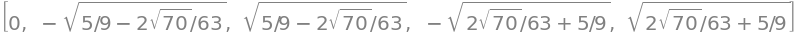

In [58]:
rovnice1 = sp.Eq(a**2 - 6*a + 7, 0)
display(sp.solve(rovnice1, a))

rovnice2_1 = sp.Eq(a+b, 5)
rovnice2_2 = sp.Eq(a-b, 1)
display(sp.solve((rovnice2_1, rovnice2_2), (a, b)))

legenda = sp.legendre(5, x)
display(legenda)
display(sp.solve(legenda, x))

6. Generování kódu
    - Vytvořte výraz $\sin(a) + \cos(b)$, vygenerujte Pythoní funkci a vykreslete pomocí matplotlib na oblasti $a \in [0, 2\pi]$ a $b \in [0, 2\pi]$.

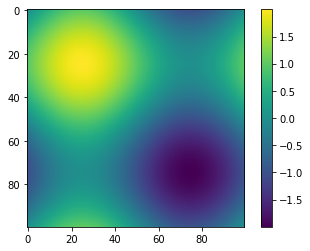

In [67]:
vyraz9 = sp.sin(a) + sp.sin(b)
fce = sp.lambdify([a, b], vyraz9)

import numpy as np
import matplotlib.pyplot as plt

acka = np.linspace(0, 2*np.pi, 100)
bcka = np.linspace(0, 2*np.pi, 100)
A, B = np.meshgrid(acka, bcka)
vysledky = fce(A, B)
plt.imshow(vysledky)
plt.colorbar()

## Pandas
1. Pomocí Pandas načtěte data ze souboru `aku.csv` zkontrolujte si zprávnost vypsáním prvních šesti řádků.
2. Vypište základní statistiky pro každý sloupec.
3. Vykreslete histogramy pomocí `seaborn` pro aloupce `A5` a `A100`.

In [84]:
import pandas as pandi_tlumocnik

data = pandi_tlumocnik.read_csv('aku.csv', delimiter=";", decimal=",")
data.head()

,A5,B5,C5,D5,A100,B100,C100,D100
0,1946.5,2006.5,1881.8,1806.9,1780.4,1654.2,1663.3,1668.4
1,1963.5,1991.5,1890.4,1788.1,1751.4,1663.1,1641.1,1641.9
2,1934.3,1988.8,1865.7,1775.0,1743.5,1633.3,1621.5,1620.0
3,1934.8,1975.4,1880.7,1805.4,1727.4,1642.2,1610.7,1685.8
4,1939.9,1998.4,1861.1,1775.7,1728.8,1656.7,1624.6,1610.5


In [78]:
data.describe()


,A5,B5,C5,D5,A100,B100,C100,D100
count,86.000000,86.000000,70.000000,79.000000,86.000000,86.000000,70.000000,79.000000
mean,1949.717442,2000.781395,1899.395714,1797.044304,1753.925581,1651.572093,1650.200000,1650.397468
std,28.874190,11.541154,20.233968,34.725789,34.636503,15.284076,29.340949,38.490335
min,1884.400000,1974.100000,1848.400000,1650.300000,1684.600000,1615.700000,1593.700000,1558.500000
25%,1931.825000,1994.175000,1887.075000,1775.900000,1726.950000,1642.125000,1628.700000,1626.600000
50%,1948.900000,2001.200000,1898.900000,1793.400000,1756.800000,1653.400000,1652.650000,1644.000000
75%,1966.100000,2009.850000,1911.550000,1820.150000,1780.000000,1663.400000,1667.500000,1683.050000
max,2030.000000,2030.900000,1942.500000,1872.200000,1838.700000,1680.700000,1713.600000,1725.700000


<AxesSubplot:xlabel='A5', ylabel='Count'>

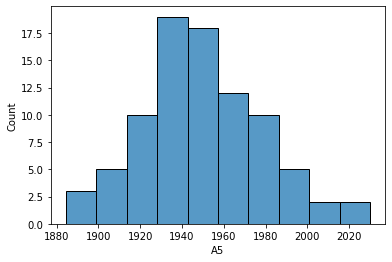

In [82]:
import seaborn as sea

sea.histplot(data, x='A5')

<AxesSubplot:xlabel='A100', ylabel='Count'>

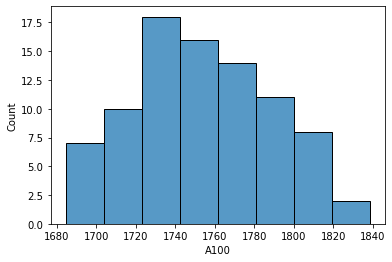

In [83]:
sea.histplot(data, x="A100")